In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import requests
from PIL import Image
from io import BytesIO

In [18]:
data = pd.read_csv('ladybird_full.csv')
image_urls = data['url']
all_species = data['species']

In [3]:
def load_image_from_url(image_url):
    response = requests.get(image_url)
    img = Image.open(BytesIO(response.content))
    return img

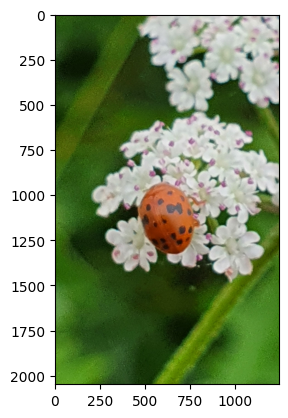

In [4]:
image_url = image_urls[0]
image = load_image_from_url(image_url)
plt.imshow(image)

In [5]:
# Get 1 image from each species and plot them all in a grid
species_images = {}
for i in range(len(all_species)):
    if all_species[i] not in species_images:
        species_images[all_species[i]] = load_image_from_url(image_urls[i])

In [6]:
species_images

{'Subcoccinella vigintiquatuorpunctata': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1240x2048>,
 'Coccinella septempunctata': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 'Harmonia axyridis': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1536x2048>,
 'Stethorus pusillus': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=2048x1536>,
 'Calvia quatuordecimguttata': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1347x1796>,
 'Adalia bipunctata': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=640x1136>,
 'Propylaea quatuordecimpunctata': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1536x2048>,
 'Brumus quadripustulatus': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1536x2048>,
 'Halyzia sedecimguttata': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1152x2048>,
 'Rhyzobius chrysomeloides': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1362x1729>,
 'Psyllobora vigintiduopunctata': <PIL.Jpeg

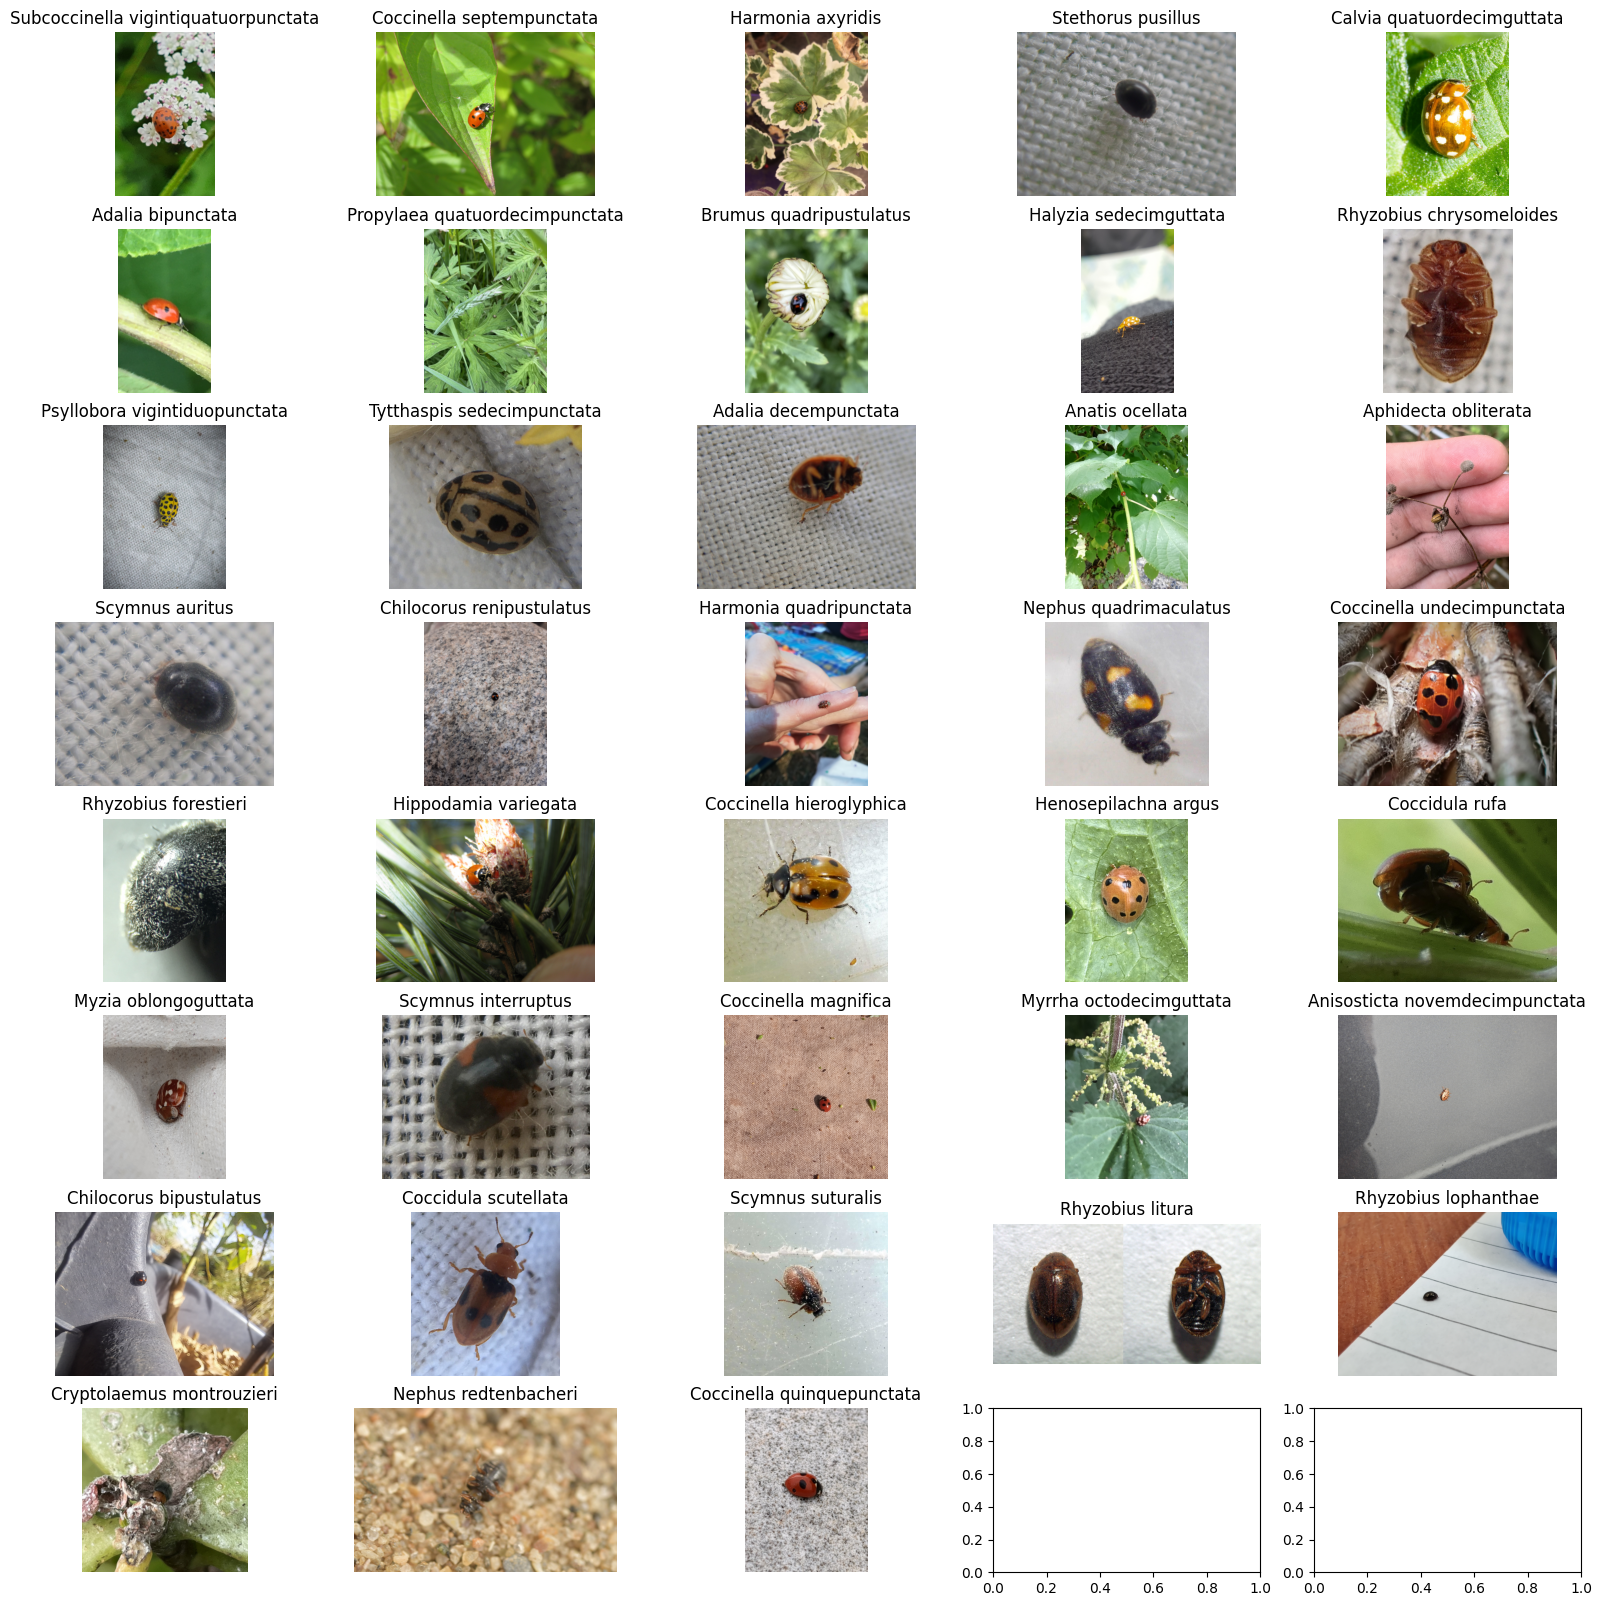

In [12]:
fig, axes = plt.subplots(8, 5, figsize=(20, 20))
for i, (species, image) in enumerate(species_images.items()):
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(species)

In [33]:
def resize_image(image, size=(224, 224)):
    return image.resize(size)

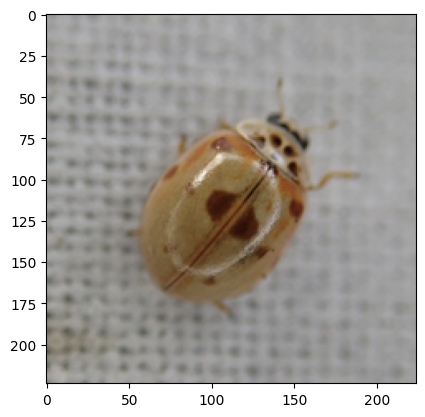

In [34]:
resized_image = resize_image(image)
plt.imshow(resized_image)

# Class split

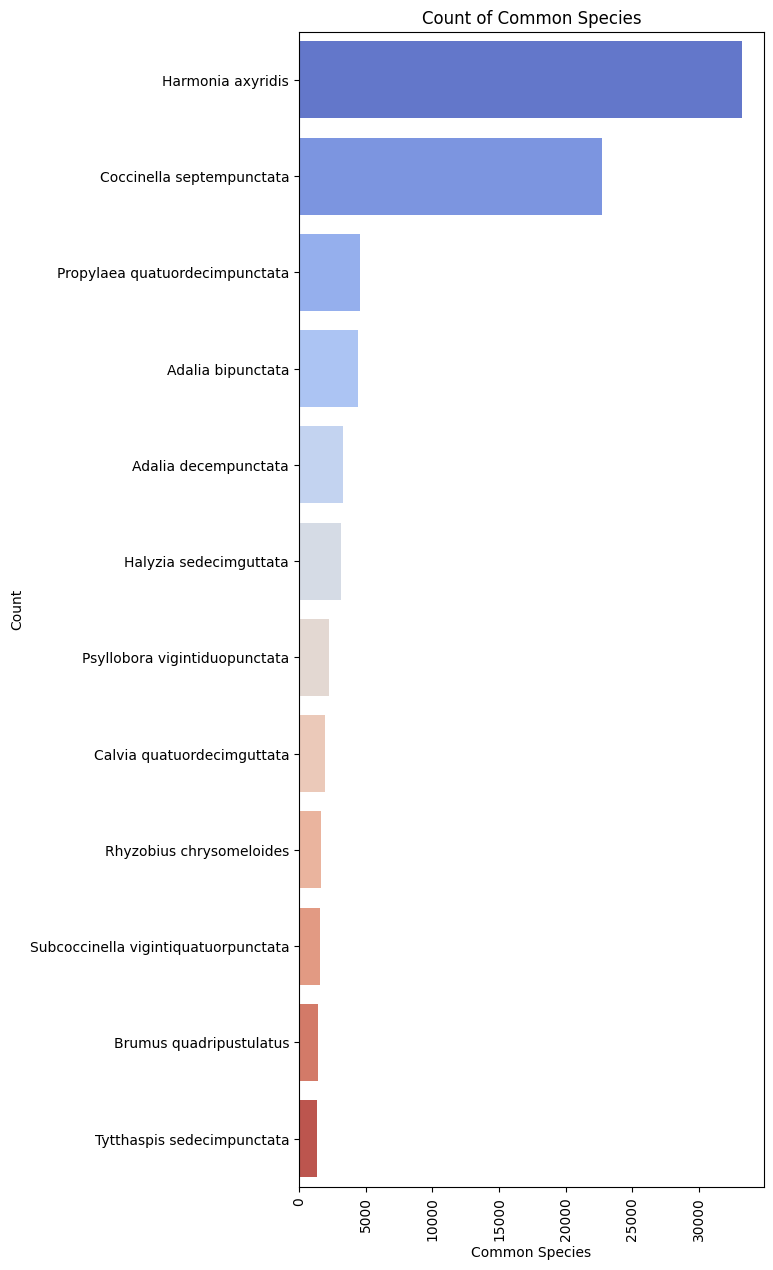

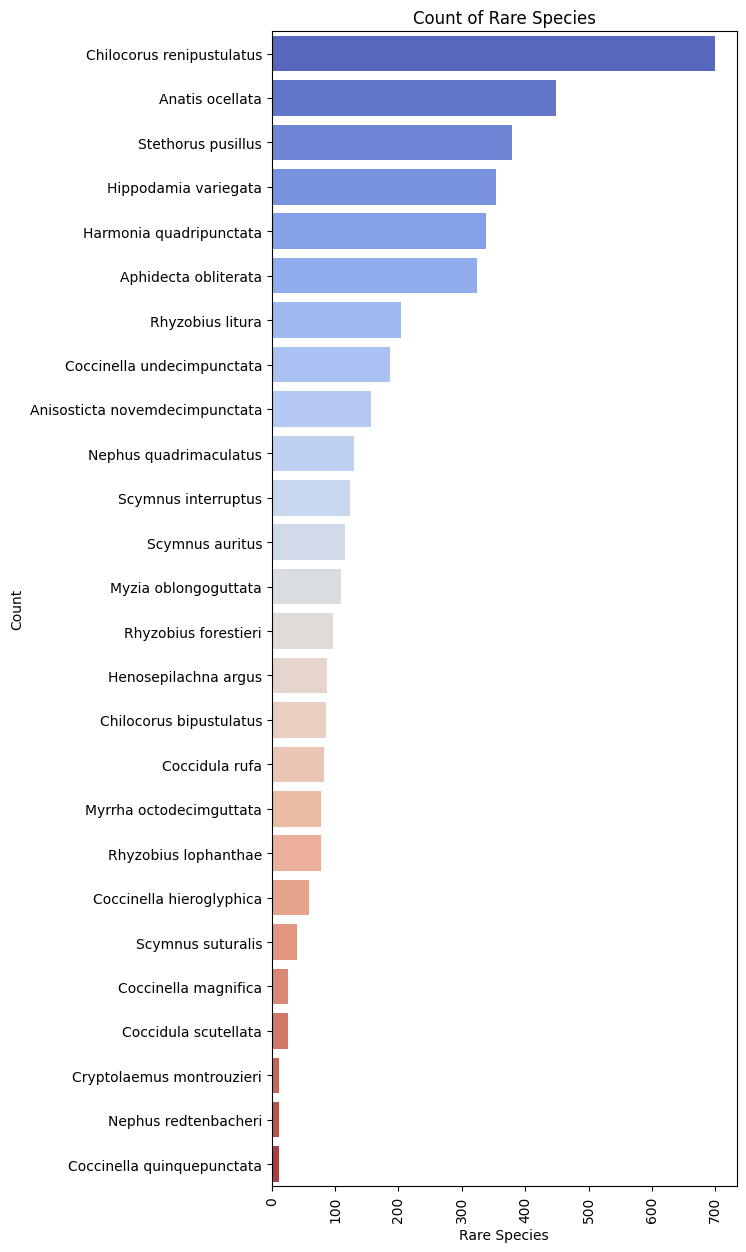

In [15]:
# Define a threshold for common species
threshold = 1000
common_species = data[data['species'].map(data['species'].value_counts()) >= threshold]
rare_species = data[data['species'].map(data['species'].value_counts()) < threshold]


# Plot common species
plt.figure(figsize=(6, 15))
sns.countplot(y='species', data=common_species, palette='coolwarm', order=common_species['species'].value_counts().index)
plt.xlabel("Common Species")
plt.ylabel("Count")
plt.title("Count of Common Species")
plt.xticks(rotation=90)
plt.show()

# Plot rare species
plt.figure(figsize=(6, 15))
sns.countplot(y='species', data=rare_species, palette='coolwarm', order=rare_species['species'].value_counts().index)
plt.xlabel("Rare Species")
plt.ylabel("Count")
plt.title("Count of Rare Species")
plt.xticks(rotation=90)
plt.show()

In [24]:
counts_df = pd.DataFrame(all_species.value_counts(normalize=True) * 100).reset_index().rename(
    columns={'index': 'species', 'species': 'percentage'})
counts_df['count'] = all_species.value_counts().reset_index()['species']
counts_df

species  percentage  count
0                      Harmonia axyridis   38.666558  33208
1              Coccinella septempunctata   26.435965  22704
2         Propylaea quatuordecimpunctata    5.334001   4581
3                      Adalia bipunctata    5.126742   4403
4                   Adalia decempunctata    3.868053   3322
5                 Halyzia sedecimguttata    3.713191   3189
6          Psyllobora vigintiduopunctata    2.637309   2265
7             Calvia quatuordecimguttata    2.307791   1982
8               Rhyzobius chrysomeloides    1.922383   1651
9   Subcoccinella vigintiquatuorpunctata    1.846698   1586
10               Brumus quadripustulatus    1.640604   1409
11            Tytthaspis sedecimpunctata    1.542797   1325
12             Chilocorus renipustulatus    0.813898    699
13                       Anatis ocellata    0.521640    448
14                    Stethorus pusillus    0.441298    379
15                  Hippodamia variegata    0.412189    354
16               Harmonia quadripunctata    0.393559    338
17                  Aphidecta obliterata    0.377257    324
18                      Rhyzobius litura    0.237532    204
19            Coccinella undecimpunctata    0.216574    186
20        Anisosticta novemdecimpunctata    0.182807    157
21                Nephus quadrimaculatus    0.151369    130
22                   Scymnus interruptus    0.144382    124
23                       Scymnus auritus    0.135067    116
24                  Myzia oblongoguttata    0.126917    109
25                  Rhyzobius forestieri    0.112944     97
26                  Henosepilachna argus    0.101301     87
27               Chilocorus bipustulatus    0.098972     85
28                        Coccidula rufa    0.096643     83
29               Myrrha octodecimguttata    0.089657     77
30                  Rhyzobius lophanthae    0.089657     77
31              Coccinella hieroglyphica    0.067534     58
32                     Scymnus suturalis    0.046575     40
33                  Coccinella magnifica    0.029109     25
34                  Coccidula scutellata    0.029109     25
35             Cryptolaemus montrouzieri    0.013972     12
36                  Nephus redtenbacheri    0.013972     12
37            Coccinella quinquepunctata    0.013972     12

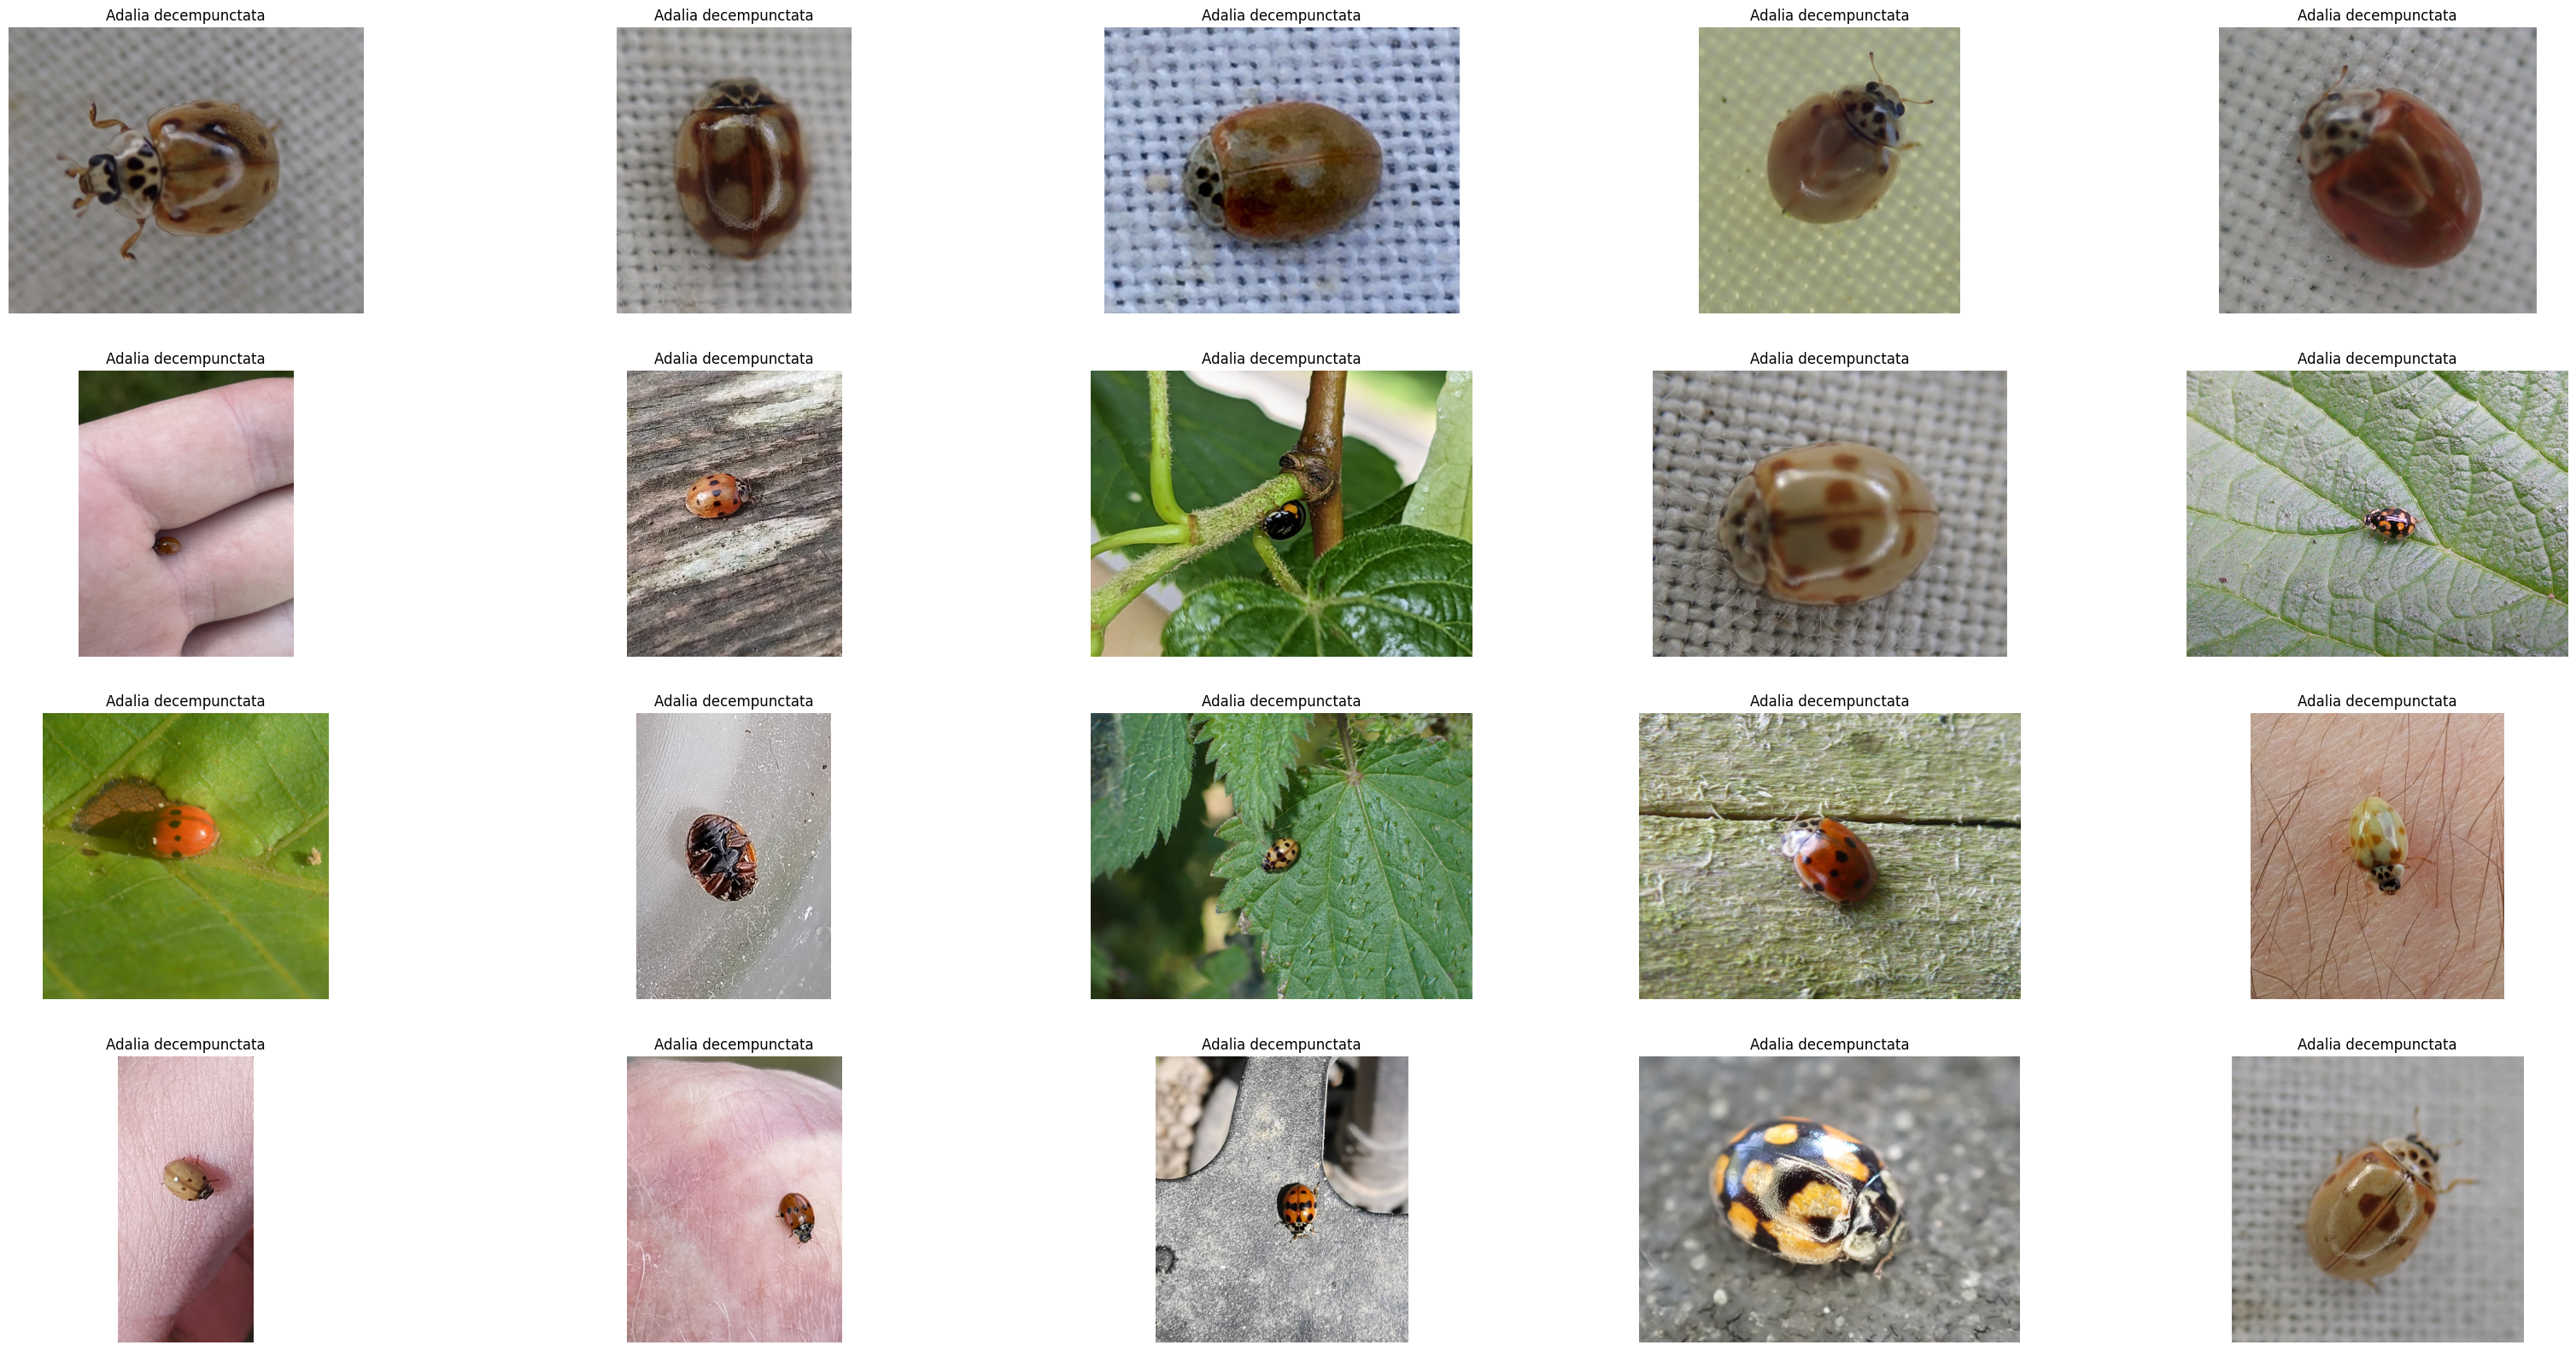

In [25]:
# Plot 10 of a given species
species_to_plot = 'Adalia decempunctata'
species_images = data[data['species'] == species_to_plot].sample(20)

fig, axes = plt.subplots(4, 5, figsize=(40, 20))
for i, (index, row) in enumerate(species_images.iterrows()):
    image = load_image_from_url(row['url'])
    ax = axes[i // 5, i % 5]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(row['species'])